In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [ ]:
def load_video(file_name):
  cam = cv2.VideoCapture("/content/" + file_name)

  currentframe = 0
  data = []

  while True:

    ret, frame = cam.read()

    if ret:

      image = cv2.resize(frame, (128, 128))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      data.append(image)

    else:
      break
  
  data = np.array(data, dtype="float32")

  cam.release()
  cv2.destroyAllWindows()

  return data / 255

In [ ]:
def make_predictions(data, model_file):

  BATCH_SIZE = int((data.size) / 10)
  model = load_model('/content/' + model_file)
  predictions = model.predict(data, batch_size = BATCH_SIZE)

  return predictions

In [4]:
def is_fire(predictions):
  fire_count = 0
  fire_flag = "No Fire"
  for cur_frame in predictions:
    if cur_frame[1] > 0.5:
        fire_count += 1
        if fire_count >= 10:
          fire_flag = "FIRE!"
          break

  return fire_flag

In [5]:
if __name__ == "__main__":
  file_name = "test_video.mp4"
  model_file = "fire_model.h5"
  data = load_video(file_name)
  predictions = make_predictions(data, model_file)
  print(is_fire(predictions))
  print(predictions.shape)

1/1 [==============================] - 3s 3s/step
FIRE!
(157, 2)


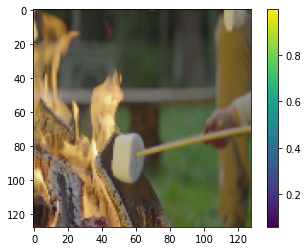

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.imshow(data[-1])
plt.colorbar()
plt.grid(False)
plt.show()